<a href="https://colab.research.google.com/github/vikram2727/open_cv/blob/main/image_processing_cv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
from google.colab.patches import cv2_imshow

In [46]:
image = cv2.imread("/content/sample_data/100 kb.jpg")

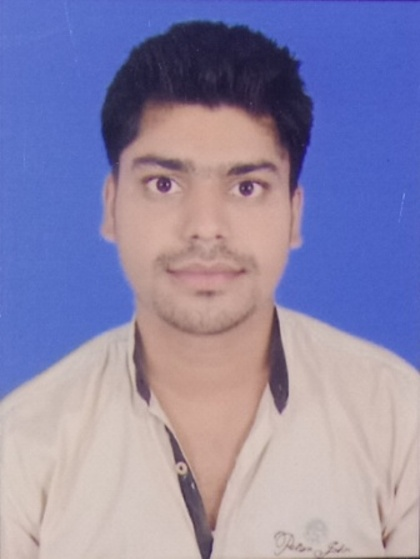

In [47]:
cv2_imshow(image)

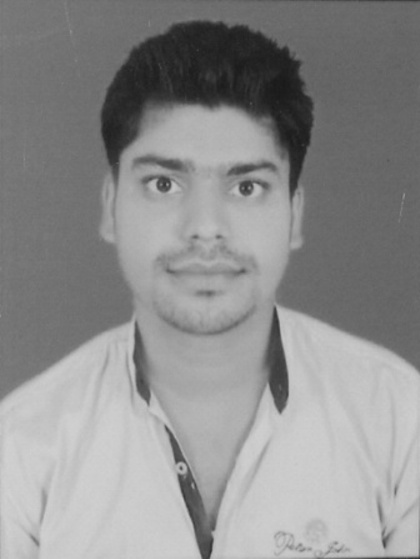

-1

In [48]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)
cv2.waitKey(0)

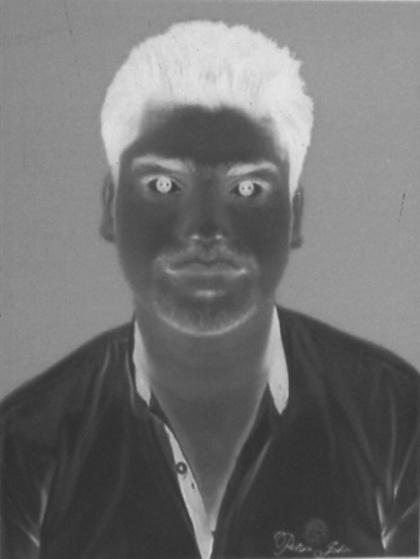

-1

In [51]:
inverted_image = 255 - gray_image
cv2_imshow(inverted_image)
cv2.waitKey()

In [52]:
blurred = cv2.GaussianBlur(inverted_image, (21, 21), 0)

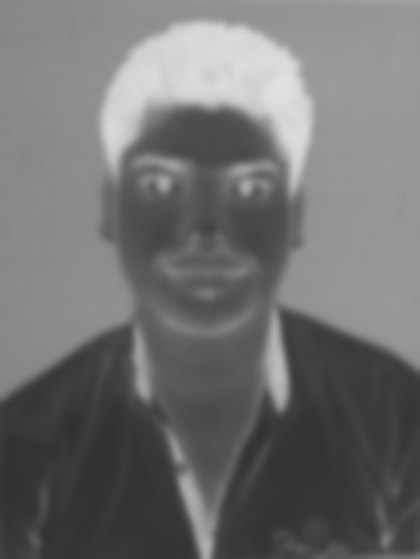

-1

In [53]:
cv2_imshow(blurred)
cv2.waitKey()

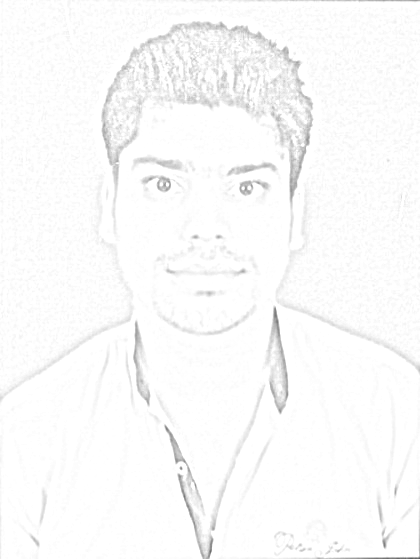

-1

In [63]:
inverted_blurred = 255- blurred
pencil_sketch = cv2.divide(gray_image, inverted_blurred, scale=256.0)
cv2_imshow(pencil_sketch)
cv2.waitKey(0)

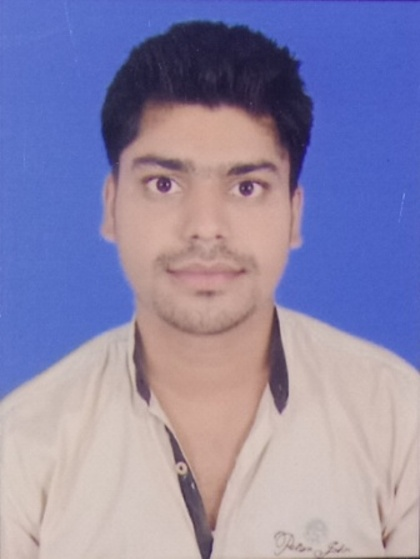

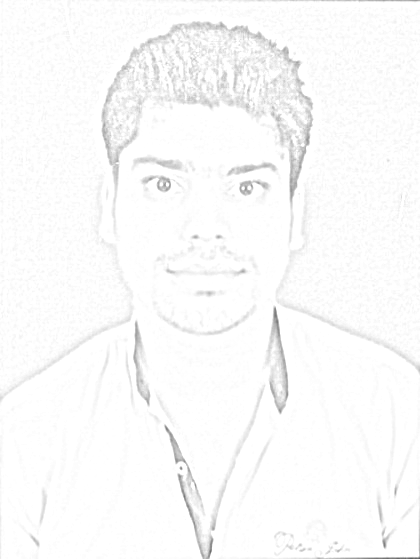

In [59]:
cv2_imshow(image)
print('\n')
cv2_imshow(pencil_sketch)
print('\n')

In [64]:
# Check the image matrix data type (could know the bit depth of the image)
print(image.dtype)
# Check the height of image 
print(image.shape[0])
# Check the width of image 
print(image.shape[1])
# Check the number of channels of the image
print(image.shape[2])

uint8
559
420
3


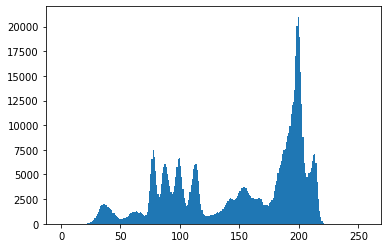

In [67]:
plt.hist(image.ravel(),bins = 256, range = [0,256]) 
plt.show()

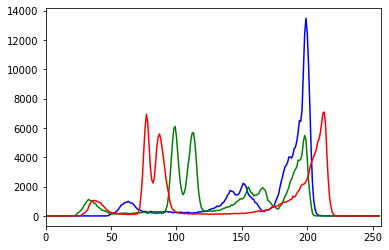

In [69]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

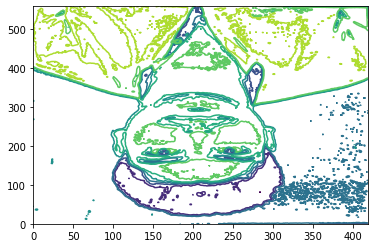

In [77]:
plt.contour(gray_image)

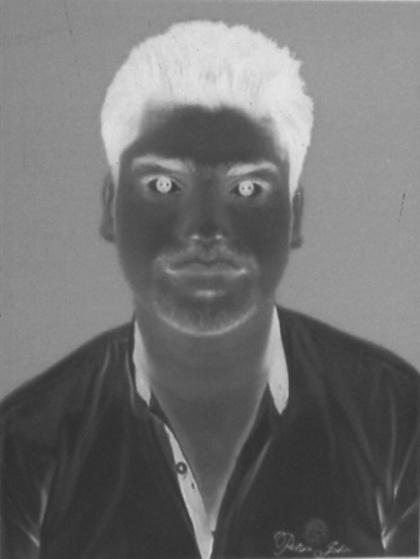

In [83]:
im2 = 255 - gray_image
cv2_imshow(im2)

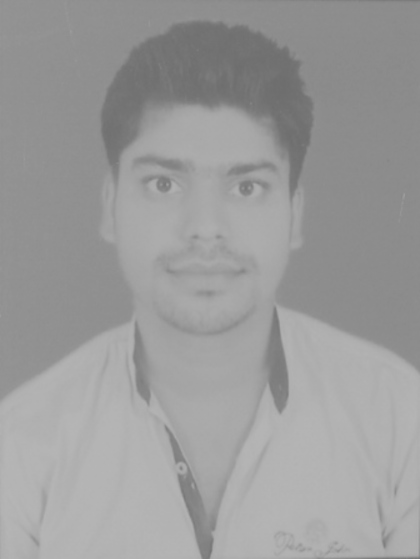

In [84]:
im3 = (100.0/255)*gray_image + 100
cv2_imshow(im3)

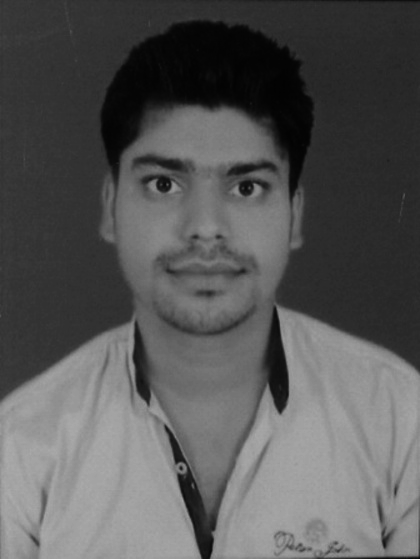

In [85]:
im4 = 255.0*(gray_image/255.0)**2
cv2_imshow(im4)

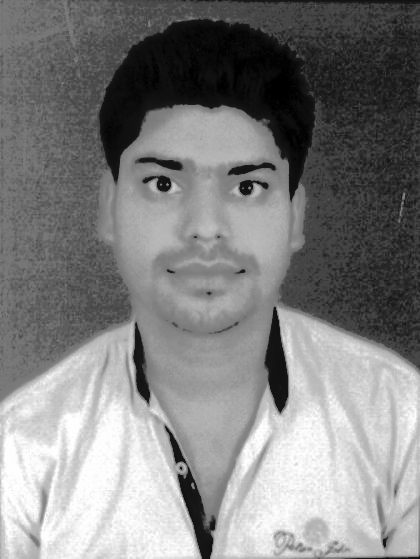

In [86]:
# function of histogram equalization
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
im5 = histeq(im4)
cv2_imshow(im5)

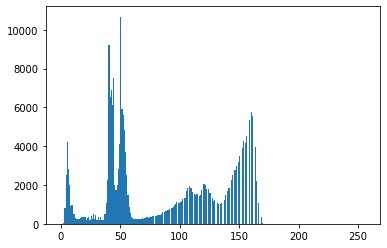

In [87]:
plt.hist(im4.ravel(),bins = 256, range = [0, 256])
plt.show()

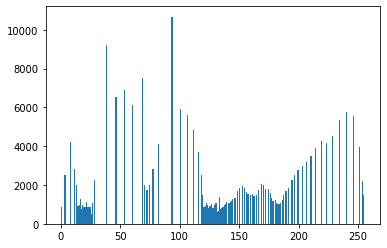

In [88]:
# After histogram equalization
plt.hist(im5.ravel(),bins = 256, range = [0, 256])
plt.show()

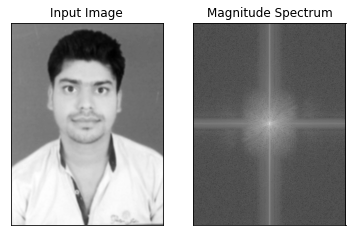

In [89]:
# Blur the grayscale image by a Guassian filter with kernel size of 10
imBlur = cv.blur(gray_image,(5,5))
# Transform the image to frequency domain
f = np.fft.fft2(imBlur)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

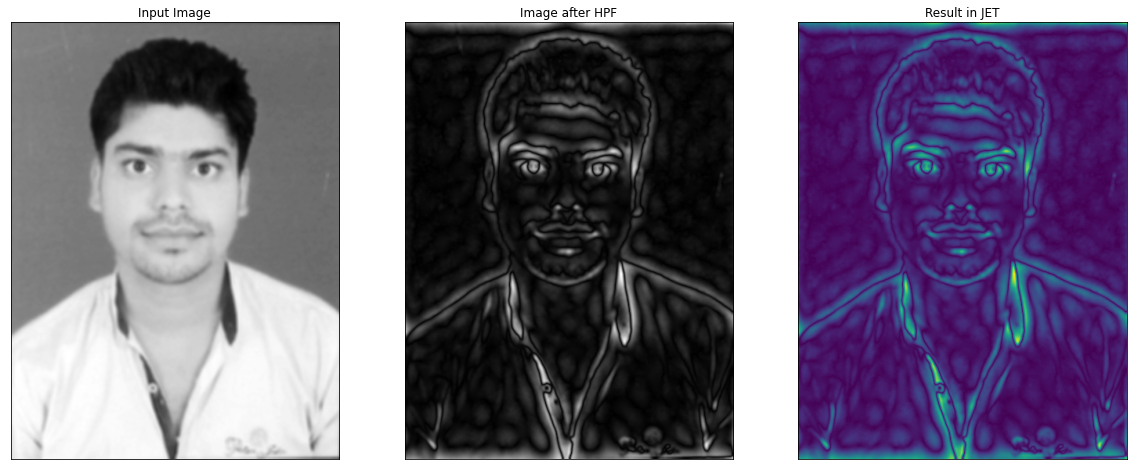

In [90]:
rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()